In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import top 3 cities and dates
nearnorth=pd.read_csv("time_series_pickup_freq_near_north.csv")
nearwest=pd.read_csv("time_series_pickup_freq_near_west.csv")
loop=pd.read_csv("time_series_pickup_freq_loop.csv")

,pickup_community_area,month,day
0,28.0,1,19
1,28.0,1,29
2,28.0,1,4
3,28.0,1,24
4,28.0,1,11


In [4]:
loop.head()

,pickup_community_area,month,day
0,32.0,1,12
1,32.0,1,20
2,32.0,1,29
3,32.0,1,4
4,32.0,1,19


In [63]:
# Merge top 3 pickup areas
top3 = nearnorth
top3 = top3.merge(nearwest, how = 'outer')
top3 = top3.merge(loop, how = 'outer')
pd.options.display.max_rows = 50 
#sort by pickup_community_area, month, day
top3 = top3.sort_values(by = ['pickup_community_area','month','day'])
top3_group = top3.groupby(['month','pickup_community_area'])
top3size=top3_group.size()
top3size.unstack().head()

pickup_community_area,8.0,28.0,32.0
month,,,
1,294174,86568,212691
2,485789,140350,371782
3,549921,155529,419155
4,553046,147420,402532
5,566223,138418,392671


In [59]:
# Number of pickups at each area for each month
top3_group.size()

month  pickup_community_area
1      8.0                      294174
       28.0                      86568
       32.0                     212691
2      8.0                      485789
       28.0                     140350
       32.0                     371782
3      8.0                      549921
       28.0                     155529
       32.0                     419155
4      8.0                      553046
       28.0                     147420
       32.0                     402532
5      8.0                      566223
       28.0                     138418
       32.0                     392671
6      8.0                      565510
       28.0                     141135
       32.0                     401399
7      8.0                      531451
       28.0                     136163
       32.0                     360868
8      8.0                      478157
       28.0                     126516
       32.0                     344455
9      8.0                      404

Text(0,0.5,u'# of pickups')

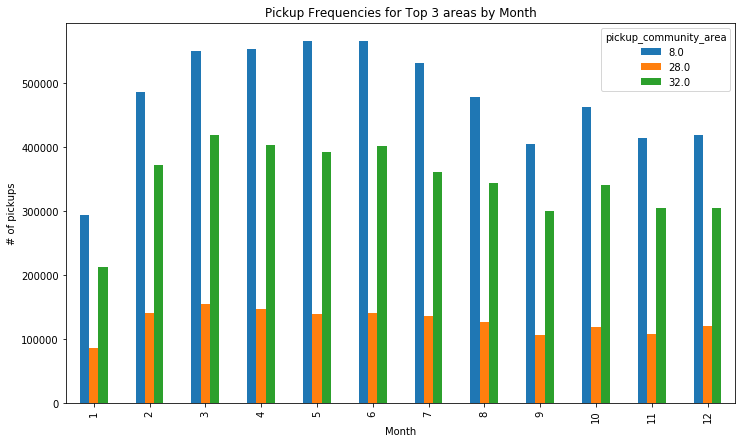

In [237]:
#total pickups by month for each top 3 areas
monthplot = top3size.unstack().plot(kind='bar',stacked =False,title="Pickup Frequencies for Top 3 areas by Month",figsize=(12,7))
monthplot.set_xlabel("Month")
monthplot.set_ylabel("# of pickups")

In [165]:
#adding the day of week and indicating if its the weekend or not
week_index = 5;
d = 1;
def calc_dow(row):
    #Day of Week
    dow = ['Sun','Mon','Tues','Wed','Thur','Fri','Sat']
    global week_index
    global d
    if d != row['day']:
        week_index += 1
        if week_index == 7:
            week_index = 0
        d = row['day']
    return dow[week_index]

def weekend_check(date_str):
    wknd = 0
    if date_str == 'Sat' or date_str == 'Sun':
        wknd =1
    return wknd

top3= top3.sort_values(by = ['month','day'])
top3['date']=top3.apply(calc_dow,axis=1)
top3['weekend']=top3['date'].apply(weekend_check)
top3

,pickup_community_area,month,day,date,weekend
0,8.0,1,1,Fri,0
1,8.0,1,1,Fri,0
2,8.0,1,1,Fri,0
3,8.0,1,1,Fri,0
4,8.0,1,1,Fri,0
5,8.0,1,1,Fri,0
6,8.0,1,1,Fri,0
7,8.0,1,1,Fri,0
8,8.0,1,1,Fri,0
9,8.0,1,1,Fri,0


In [166]:
# testing section
#test = loop #.loc[(loop['month'] == 1)]
#test.insert(loc = 3, column = 'date',value = '')
#test.insert(loc = 4, column = 'weekend',value = 0)
#test= test.sort_values(by = ['month','day'])
#test=test.reset_index()
top3.to_csv("top3_weekend.csv")

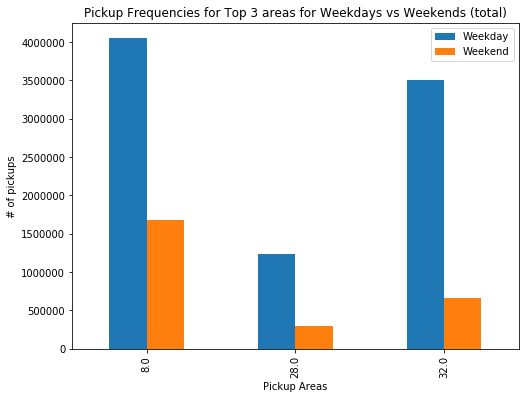

In [304]:
#number of total pickups during the weekday and weekend for each top 3 area for the whole year
top3_weekend = top3.groupby((['pickup_community_area','weekend'])).size()
weekendplot = top3_weekend.unstack().plot(kind='bar',stacked =False,title="Pickup Frequencies for Top 3 areas for Weekdays vs Weekends (total)",figsize=(8,6))
weekendplot.set_xlabel("Pickup Areas")
weekendplot.set_ylabel("# of pickups")
weekendplot.legend(["Weekday","Weekend"])

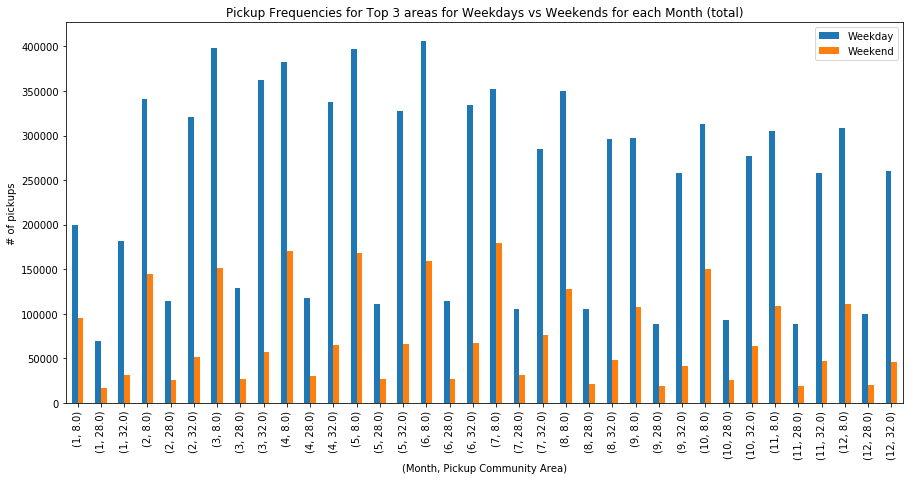

In [301]:
# total number of pickups during the weekend and weekday in each top 3 areas divided by month
top3_weekend_month = top3.groupby((['month','pickup_community_area','weekend'])).size()
weekendmonthplot = top3_weekend_month.unstack().plot(kind='bar',stacked =False,title="Pickup Frequencies for Top 3 areas for Weekdays vs Weekends for each Month (total)",figsize=(15,7))
weekendmonthplot.set_xlabel("(Month, Pickup Community Area)")
weekendmonthplot.set_ylabel("# of pickups")
weekendmonthplot.legend(["Weekday","Weekend"])

[Text(0,0,u'Monday'),
 Text(0,0,u'Tuesday'),
 Text(0,0,u'Wednesday'),
 Text(0,0,u'Thursday'),
 Text(0,0,u'Friday'),
 Text(0,0,u'Saturday'),
 Text(0,0,u'Sunday')]

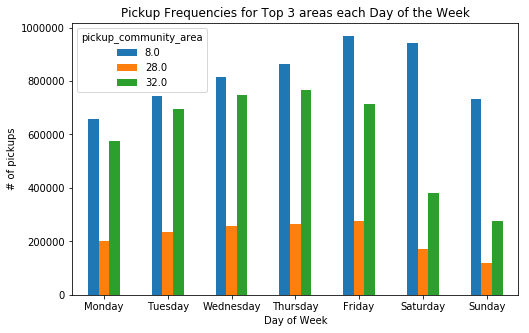

In [205]:
#average pickup frequency for each day of week in the top 3
def dateid(date_str):
    if date_str == 'Mon':
        did = 0
    elif date_str == 'Tues':
        did = 1
    elif date_str == 'Wed':
        did = 2
    elif date_str == 'Thur':
        did = 3
    elif date_str == 'Fri':
        did = 4
    elif date_str == 'Sat':
        did = 5
    elif date_str == 'Sun':
        did = 6
    return did

top3['day_id']=top3['date'].apply(dateid)
top3_date = top3.groupby((['day_id','pickup_community_area'])).size()
dateplot = top3_date.unstack().plot(kind='bar',stacked =False,title="Pickup Frequencies for Top 3 areas each Day of the Week",figsize=(8,5))
dateplot.set_xlabel("Day of Week")
dateplot.set_ylabel("# of pickups")
xticks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dateplot.set_xticklabels(xticks,rotation=0)

810108
837174
247189
145273
699423


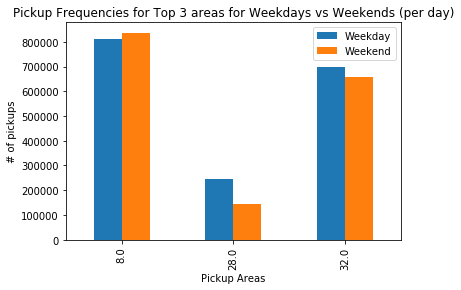

In [235]:
# get the average of rides per day for the weekday and weekend in each area
top3_weekend_perday = top3.groupby((['pickup_community_area','weekend'])).size()
wknd = 0
for i in range(0,5):
    if wknd == 0:
        top3_weekend_perday[i] = top3_weekend_perday[i] / 5
        wknd=1
    else:
        top3_weekend_perday[i] = top3_weekend_perday[i] / 2
        wknd = 0
    print(top3_weekend_perday[i])
weekend_perday_plot = top3_weekend_perday.unstack().plot(kind='bar',stacked =False,title="Pickup Frequencies for Top 3 areas for Weekdays vs Weekends (per day)")
weekend_perday_plot.set_xlabel("Pickup Areas")
weekend_perday_plot.set_ylabel("# of pickups")
weekend_perday_plot.legend(["Weekday","Weekend"])

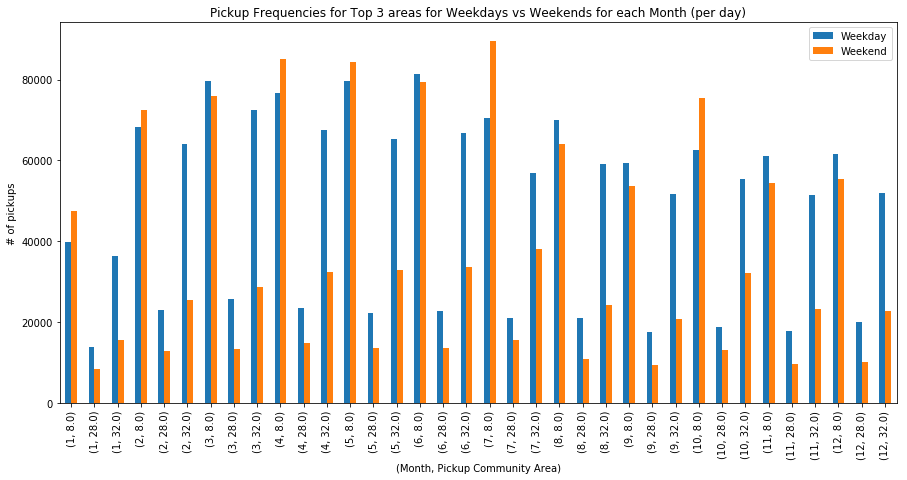

In [300]:
# Average pickup count per day for each area throught the year, broken up by month
top3_weekend_month = top3.groupby((['month','pickup_community_area','weekend'])).size()
top3_mn_wknd = top3_weekend_month
wknd = 0
for i in range(1,13):
    for j in range(0,6):
        if wknd == 0:
            top3_mn_wknd[i][j] = top3_weekend_month[i][j] / 5
            wknd=1
        else:
            top3_mn_wknd[i][j] = top3_weekend_month[i][j] / 2
            wknd = 0
top3_weekend_month = top3.groupby((['month','pickup_community_area','weekend'])).size()
wknd_mnplot = top3_mn_wknd.unstack().plot(kind='bar',stacked =False,title="Pickup Frequencies for Top 3 areas for Weekdays vs Weekends for each Month (per day)",figsize=(15,7))
wknd_mnplot.set_xlabel("(Month, Pickup Community Area)")
wknd_mnplot.set_ylabel("# of pickups")
wknd_mnplot.legend(["Weekday","Weekend"])

In [293]:
# checking the change
top3_weekend_month
#top3_mn_wknd

month  pickup_community_area  weekend
1      8.0                    0          199222
                              1           94952
       28.0                   0           69572
                              1           16996
       32.0                   0          181654
                              1           31037
2      8.0                    0          340883
                              1          144906
       28.0                   0          114802
                              1           25548
       32.0                   0          320761
                              1           51021
3      8.0                    0          398139
                              1          151782
       28.0                   0          128839
                              1           26690
       32.0                   0          361840
                              1           57315
4      8.0                    0          382957
                              1          170089
  